## Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from src.config import DATA_RAW
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load datasets
sales = pd.read_csv(DATA_RAW / 'sales.csv')
products = pd.read_csv(DATA_RAW / 'products.csv')
events = pd.read_csv(DATA_RAW / 'ethiopian_events.csv')
fasting = pd.read_csv(DATA_RAW / 'fasting_periods.csv')

# Convert date columns to datetime
sales['date'] = pd.to_datetime(sales['date'])
events['date'] = pd.to_datetime(events['date'])
fasting['start_date'] = pd.to_datetime(fasting['start_date'])
fasting['end_date'] = pd.to_datetime(fasting['end_date'])

2. Basic Data Overview

In [5]:
def basic_data_summary():
    """Show basic information about each dataset"""
    print("=" * 60)
    print("= DATASET OVERVIEW")
    print("=" * 60)
    
    datasets = {
        'Sales': sales,
        'Products': products,
        'Events': events,
        'Fasting Periods': fasting
    }
    
    for name, df in datasets.items():
        print(f"\n{name.upper()} Dataset:")
        print(f"Shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        print(f"First few rows:")
        display(df.head(3))
        print("-" * 40)

basic_data_summary()

= DATASET OVERVIEW

SALES Dataset:
Shape: (1591388, 5)
Columns: ['date', 'sales_id', 'sku_id', 'category', 'quantity']
First few rows:


,date,sales_id,sku_id,category,quantity
0,2020-09-11,31661787,NIB-SNA003,Snacks & Candy,3
1,2020-09-11,31661787,NES-MIL001,Milk,2
2,2020-09-11,31661787,ROA-BAL001,"Baltna, Coffee, Tea & Spices",1


----------------------------------------

PRODUCTS Dataset:
Shape: (513, 4)
Columns: ['SKU ID', 'product name', 'product category', 'price in birr']
First few rows:


,SKU ID,product name,product category,price in birr
0,NUT-BAB001,Nutty flakes,Baby Food,247.0
1,ENR-BAB001,Enrich corn flakes 500g,Baby Food,281.0
2,ENR-BAB002,Enrich Coco crunch 375g,Baby Food,247.0


----------------------------------------

EVENTS Dataset:
Shape: (33, 3)
Columns: ['date', 'event_name', 'is_holiday']
First few rows:


,date,event_name,is_holiday
0,2020-09-11,Enkutatash,1
1,2021-09-11,Enkutatash,1
2,2022-09-11,Enkutatash,1


----------------------------------------

FASTING PERIODS Dataset:
Shape: (16, 3)
Columns: ['start_date', 'end_date', 'fasting_name']
First few rows:


,start_date,end_date,fasting_name
0,2020-11-24,2021-01-07,gena tsom
1,2021-03-08,2021-05-02,abiy tsom
2,2021-06-21,2021-07-12,sene tsom


----------------------------------------


3. Sales Data Visualizations

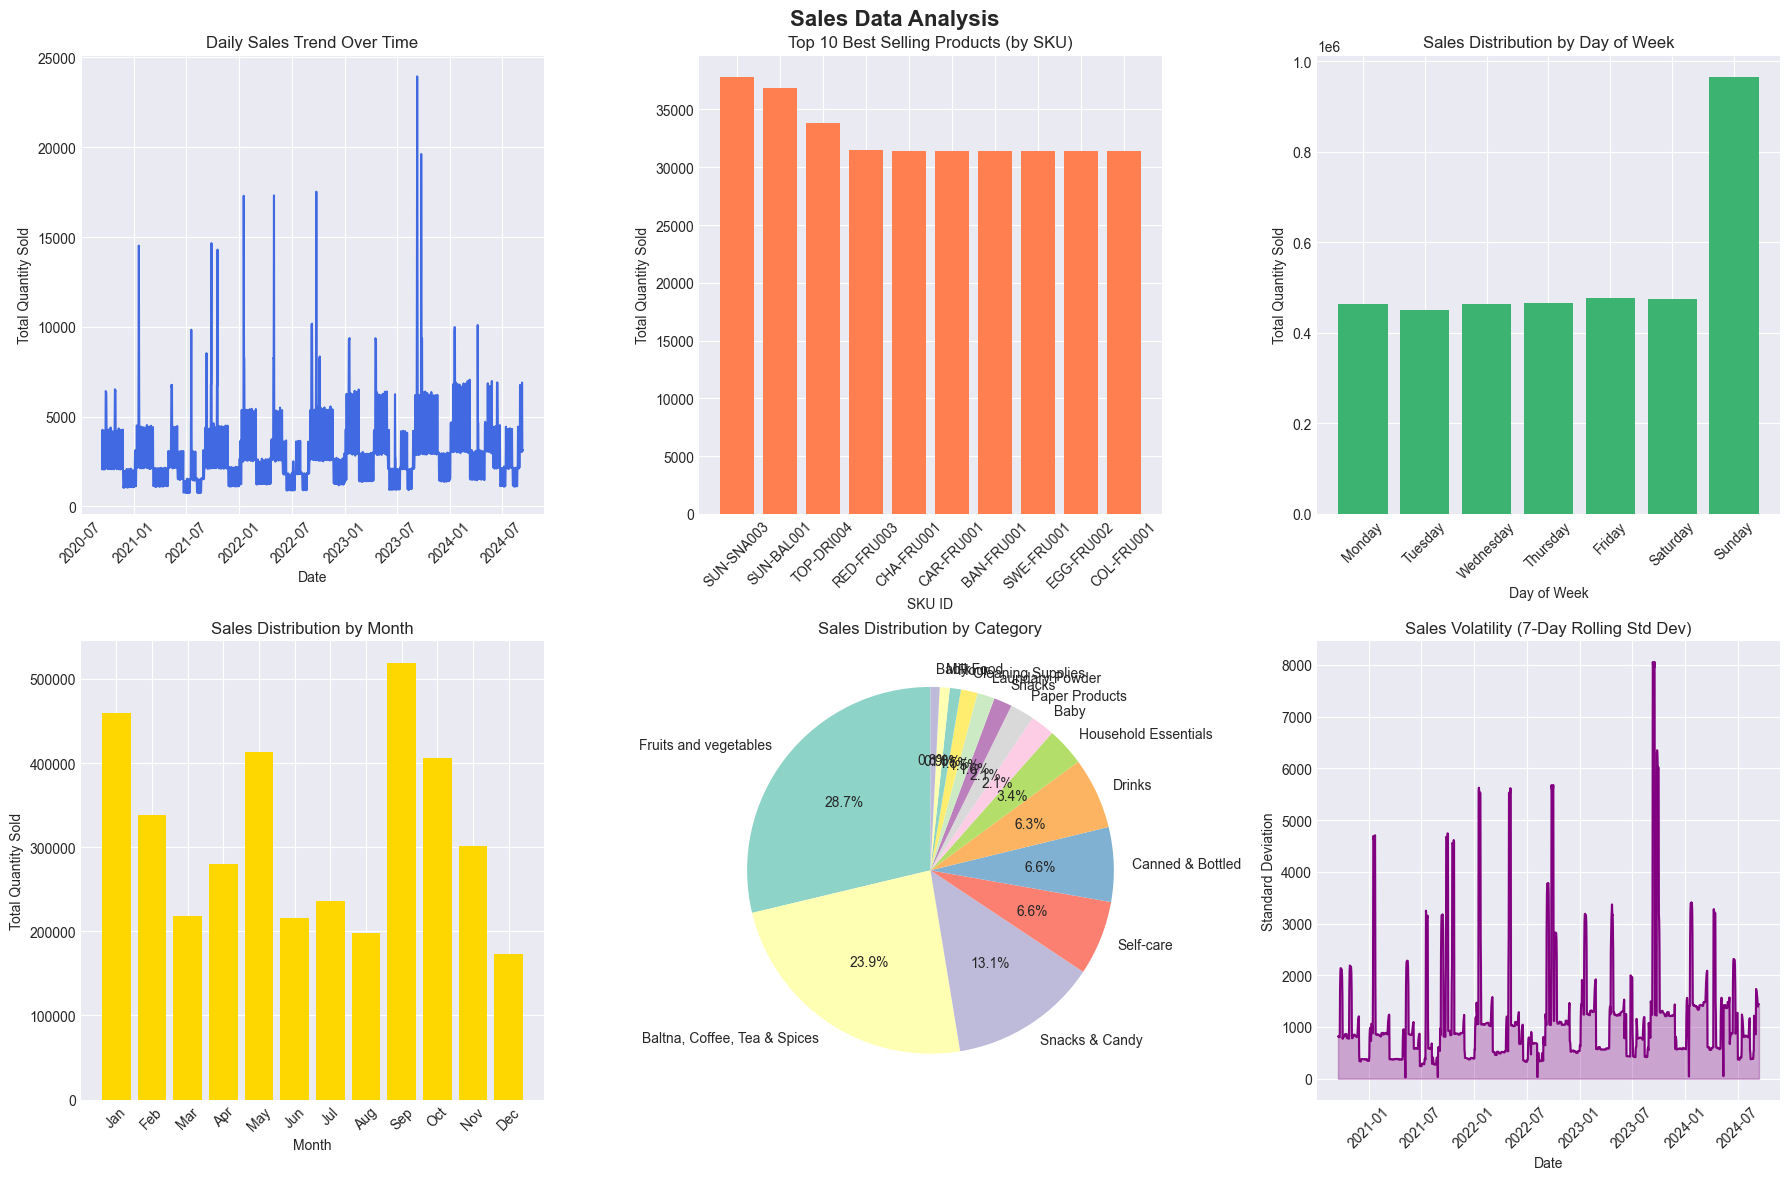

In [6]:
def plot_sales_analysis():
    """Create comprehensive sales visualizations"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Sales Data Analysis', fontsize=16, fontweight='bold')
    
    # 1. Sales Trend Over Time
    daily_sales = sales.groupby('date')['quantity'].sum().reset_index()
    axes[0, 0].plot(daily_sales['date'], daily_sales['quantity'], 
                   color='royalblue', linewidth=1.5)
    axes[0, 0].set_title('Daily Sales Trend Over Time')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Total Quantity Sold')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Top Selling Products
    top_products = sales.groupby('sku_id')['quantity'].sum().sort_values(ascending=False).head(10)
    axes[0, 1].bar(range(len(top_products)), top_products.values, color='coral')
    axes[0, 1].set_title('Top 10 Best Selling Products (by SKU)')
    axes[0, 1].set_xlabel('SKU ID')
    axes[0, 1].set_ylabel('Total Quantity Sold')
    axes[0, 1].set_xticks(range(len(top_products)))
    axes[0, 1].set_xticklabels(top_products.index, rotation=45)
    
    # 3. Sales by Day of Week
    sales['day_of_week'] = sales['date'].dt.day_name()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_sales = sales.groupby('day_of_week')['quantity'].sum().reindex(day_order)
    axes[0, 2].bar(range(len(day_order)), day_sales.values, color='mediumseagreen')
    axes[0, 2].set_title('Sales Distribution by Day of Week')
    axes[0, 2].set_xlabel('Day of Week')
    axes[0, 2].set_ylabel('Total Quantity Sold')
    axes[0, 2].set_xticks(range(len(day_order)))
    axes[0, 2].set_xticklabels(day_order, rotation=45)
    
    # 4. Sales by Month
    sales['month'] = sales['date'].dt.month_name()
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    month_sales = sales.groupby('month')['quantity'].sum().reindex(month_order, fill_value=0)
    axes[1, 0].bar(range(len(month_order)), month_sales.values, color='gold')
    axes[1, 0].set_title('Sales Distribution by Month')
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Total Quantity Sold')
    axes[1, 0].set_xticks(range(len(month_order)))
    axes[1, 0].set_xticklabels([m[:3] for m in month_order], rotation=45)
    
    # 5. Category Distribution
    category_sales = sales.groupby('category')['quantity'].sum().sort_values(ascending=False)
    axes[1, 1].pie(category_sales.values, labels=category_sales.index, 
                   autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
    axes[1, 1].set_title('Sales Distribution by Category')
    
    # 6. Sales Volatility (Rolling Standard Deviation)
    daily_sales = daily_sales.set_index('date')
    rolling_std = daily_sales['quantity'].rolling(window=7).std()
    axes[1, 2].plot(rolling_std.index, rolling_std.values, 
                   color='purple', linewidth=1.5)
    axes[1, 2].set_title('Sales Volatility (7-Day Rolling Std Dev)')
    axes[1, 2].set_xlabel('Date')
    axes[1, 2].set_ylabel('Standard Deviation')
    axes[1, 2].tick_params(axis='x', rotation=45)
    axes[1, 2].fill_between(rolling_std.index, 0, rolling_std.values, 
                           alpha=0.3, color='purple')
    
    plt.tight_layout()
    plt.show()

plot_sales_analysis()

4. Products Data Visualization

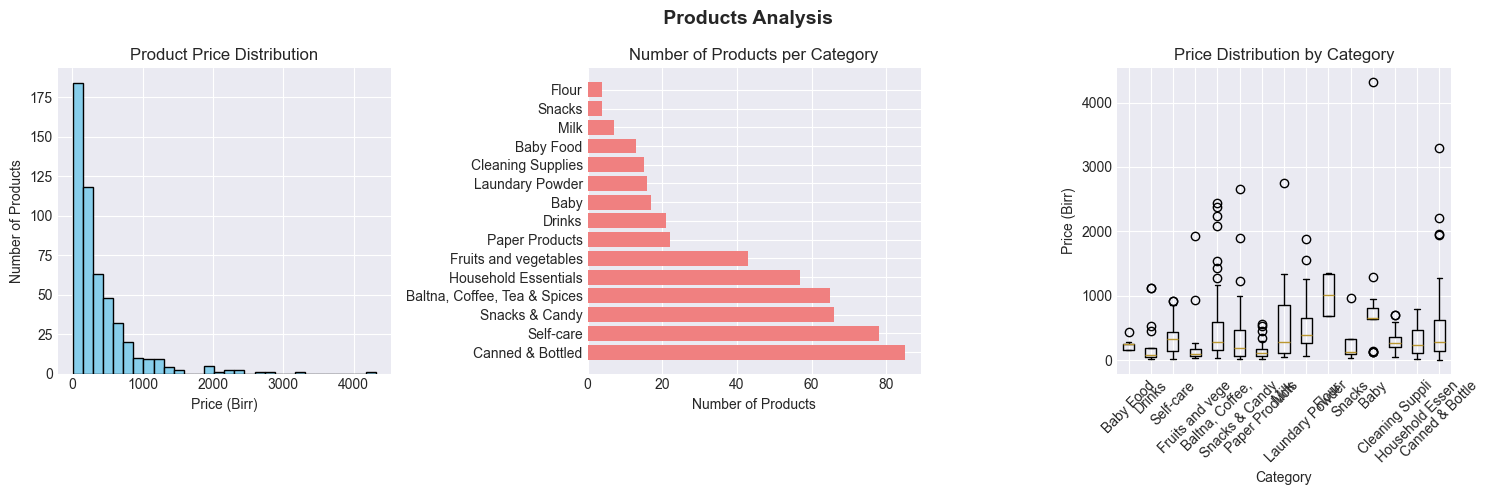

In [7]:
def plot_products_analysis():
    """Visualize product information"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(' Products Analysis', fontsize=14, fontweight='bold')
    
    # 1. Price Distribution
    axes[0].hist(products['price in birr'], bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title('Product Price Distribution')
    axes[0].set_xlabel('Price (Birr)')
    axes[0].set_ylabel('Number of Products')
    
    # 2. Products per Category
    category_counts = products['product category'].value_counts()
    axes[1].barh(range(len(category_counts)), category_counts.values, color='lightcoral')
    axes[1].set_title('Number of Products per Category')
    axes[1].set_xlabel('Number of Products')
    axes[1].set_yticks(range(len(category_counts)))
    axes[1].set_yticklabels(category_counts.index)
    
    # 3. Price vs Category (Box Plot)
    price_data = []
    categories = products['product category'].unique()
    for cat in categories:
        price_data.append(products[products['product category'] == cat]['price in birr'].values)
    
    axes[2].boxplot(price_data, labels=[cat[:15] for cat in categories])
    axes[2].set_title('Price Distribution by Category')
    axes[2].set_xlabel('Category')
    axes[2].set_ylabel('Price (Birr)')
    axes[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_products_analysis()

5. Events & Fasting Visualization

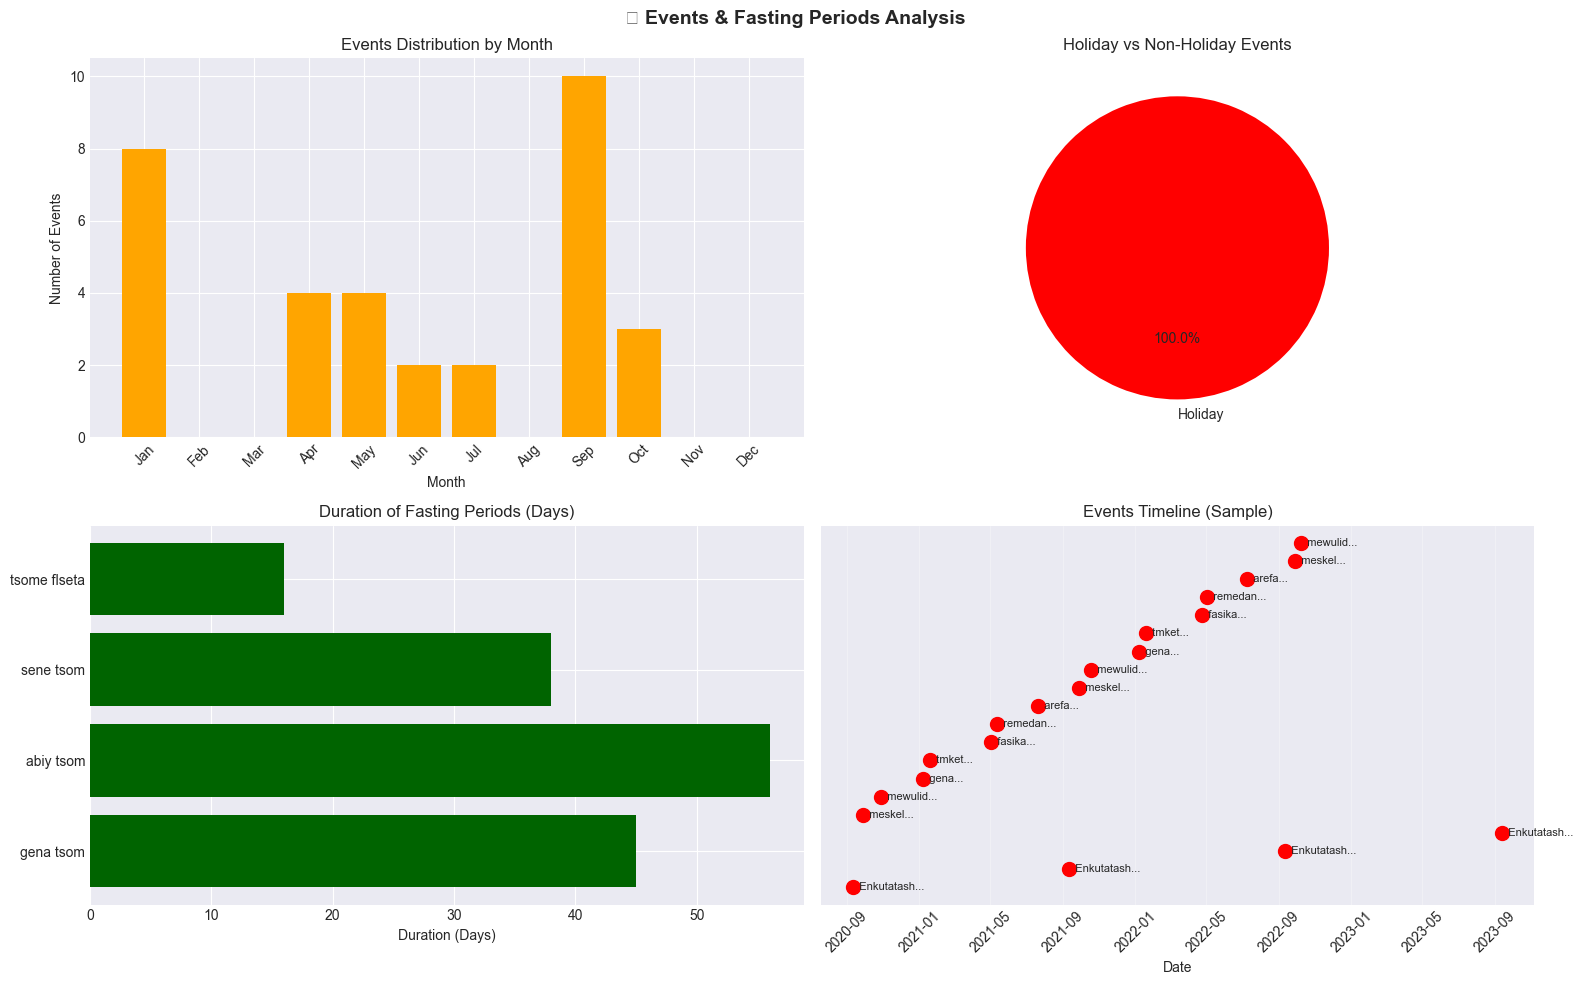

In [8]:
def plot_events_fasting_analysis():
    """Visualize events and fasting periods"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Events & Fasting Periods Analysis', fontsize=14, fontweight='bold')
    
    # 1. Events Distribution by Month
    events['month'] = events['date'].dt.month_name()
    events_by_month = events.groupby('month').size().reindex([
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ], fill_value=0)
    
    axes[0, 0].bar(range(12), events_by_month.values, color='orange')
    axes[0, 0].set_title('Events Distribution by Month')
    axes[0, 0].set_xlabel('Month')
    axes[0, 0].set_ylabel('Number of Events')
    axes[0, 0].set_xticks(range(12))
    axes[0, 0].set_xticklabels([m[:3] for m in events_by_month.index], rotation=45)
    
    # 2. Holiday vs Non-Holiday Events
    holiday_counts = events['is_holiday'].value_counts()
    labels = ['Holiday' if x == 1 else 'Non-Holiday' for x in holiday_counts.index]
    axes[0, 1].pie(holiday_counts.values, labels=labels, autopct='%1.1f%%', 
                   colors=['red', 'lightblue'], startangle=90)
    axes[0, 1].set_title('Holiday vs Non-Holiday Events')
    
    # 3. Fasting Periods Duration
    fasting['duration_days'] = (fasting['end_date'] - fasting['start_date']).dt.days + 1
    axes[1, 0].barh(fasting['fasting_name'], fasting['duration_days'], color='darkgreen')
    axes[1, 0].set_title('Duration of Fasting Periods (Days)')
    axes[1, 0].set_xlabel('Duration (Days)')
    
    # 4. Events Timeline (Gantt-style)
    # Create a timeline of events
    events_sample = events.head(20)  # Show first 20 events for clarity
    
    # Create vertical positions for each event
    y_positions = range(len(events_sample))
    
    for i, (idx, row) in enumerate(events_sample.iterrows()):
        axes[1, 1].scatter(row['date'], i, s=100, 
                          c='red' if row['is_holiday'] == 1 else 'blue',
                          marker='o' if row['is_holiday'] == 1 else 's')
        axes[1, 1].text(row['date'], i, f"  {row['event_name'][:15]}...", 
                       fontsize=8, verticalalignment='center')
    
    axes[1, 1].set_title('Events Timeline (Sample)')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_yticks([])
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_events_fasting_analysis()

6. Combined Analysis: Sales with Events & Fasting

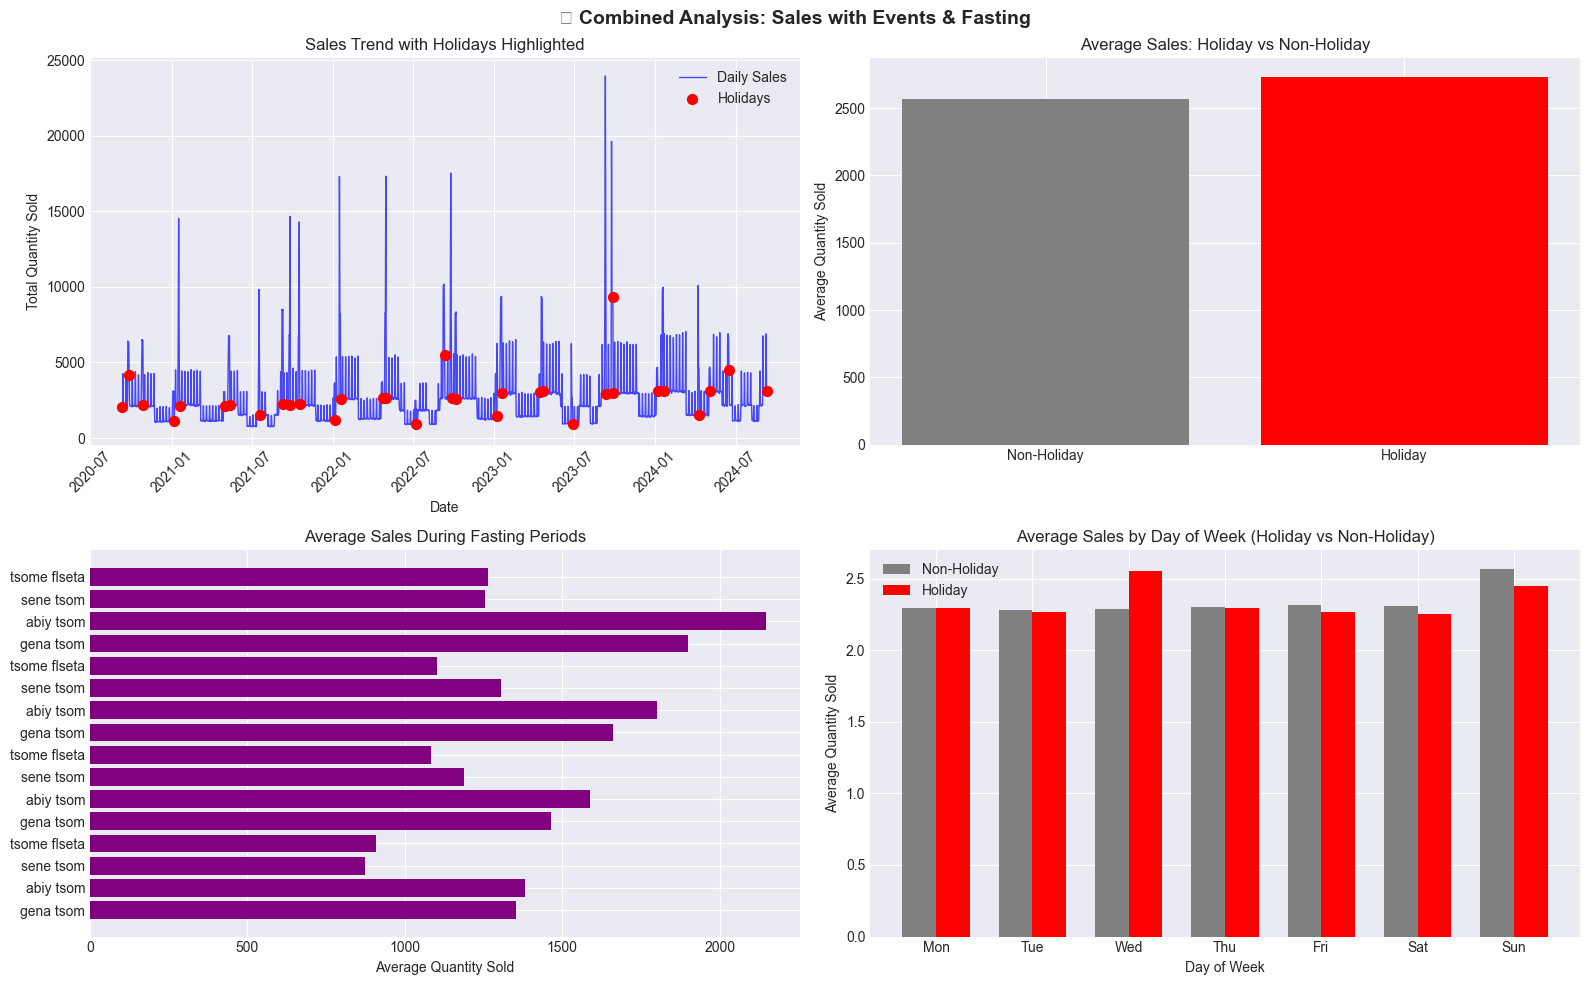

In [11]:
def plot_combined_analysis():
    """Combine sales data with events and fasting for insights"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Combined Analysis: Sales with Events & Fasting', fontsize=14, fontweight='bold')
    
    # Prepare data
    daily_sales = sales.groupby('date')['quantity'].sum().reset_index()
    
    # 1. Sales with Holiday Overlay
    axes[0, 0].plot(daily_sales['date'], daily_sales['quantity'], 
                   color='blue', linewidth=1, alpha=0.7, label='Daily Sales')
    
    # Mark holidays
    holiday_dates = events[events['is_holiday'] == 1]['date']
    holiday_sales = daily_sales[daily_sales['date'].isin(holiday_dates)]
    
    if not holiday_sales.empty:
        axes[0, 0].scatter(holiday_sales['date'], holiday_sales['quantity'], 
                          color='red', s=50, label='Holidays', zorder=5)
    
    axes[0, 0].set_title('Sales Trend with Holidays Highlighted')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Total Quantity Sold')
    axes[0, 0].legend()
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Average Sales: Holiday vs Non-Holiday
    daily_sales['is_holiday'] = daily_sales['date'].isin(holiday_dates).astype(int)
    holiday_avg = daily_sales[daily_sales['is_holiday'] == 1]['quantity'].mean()
    non_holiday_avg = daily_sales[daily_sales['is_holiday'] == 0]['quantity'].mean()
    
    axes[0, 1].bar(['Non-Holiday', 'Holiday'], [non_holiday_avg, holiday_avg], 
                  color=['gray', 'red'])
    axes[0, 1].set_title('Average Sales: Holiday vs Non-Holiday')
    axes[0, 1].set_ylabel('Average Quantity Sold')
    
    # 3. Fasting Periods Impact (conceptual)
    fasting_impact = []
    fasting_labels = []
    
    for _, fast in fasting.iterrows():
        # Find sales during fasting period
        fasting_sales = daily_sales[
            (daily_sales['date'] >= fast['start_date']) & 
            (daily_sales['date'] <= fast['end_date'])
        ]
        
        if len(fasting_sales) > 0:
            fasting_impact.append(fasting_sales['quantity'].mean())
            fasting_labels.append(fast['fasting_name'][:15])
    
    if fasting_impact:
        axes[1, 0].barh(range(len(fasting_labels)), fasting_impact, color='purple')
        axes[1, 0].set_title('Average Sales During Fasting Periods')
        axes[1, 0].set_xlabel('Average Quantity Sold')
        axes[1, 0].set_yticks(range(len(fasting_labels)))
        axes[1, 0].set_yticklabels(fasting_labels)
    
    # 4. Day of Week Sales with Holiday Indicator
    sales_with_dow = sales.copy()
    sales_with_dow['day_of_week'] = sales_with_dow['date'].dt.dayofweek
    sales_with_dow['is_holiday'] = sales_with_dow['date'].isin(holiday_dates).astype(int)
    
    dow_holiday_sales = sales_with_dow.groupby(['day_of_week', 'is_holiday'])['quantity'].mean().unstack()
    
    x = np.arange(7)
    width = 0.35
    
    if 0 in dow_holiday_sales.columns:
        axes[1, 1].bar(x - width/2, dow_holiday_sales[0], width, label='Non-Holiday', color='gray')
    if 1 in dow_holiday_sales.columns:
        axes[1, 1].bar(x + width/2, dow_holiday_sales[1], width, label='Holiday', color='red')
    
    axes[1, 1].set_title('Average Sales by Day of Week (Holiday vs Non-Holiday)')
    axes[1, 1].set_xlabel('Day of Week')
    axes[1, 1].set_ylabel('Average Quantity Sold')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

plot_combined_analysis()

Interactive Visualizations

In [27]:
def create_interactive_summary():
    """Create a summary dashboard of key metrics"""
    
    # Calculate key metrics
    total_sales = sales['quantity'].sum()
    avg_daily_sales = sales.groupby('date')['quantity'].sum().mean()
    unique_products = sales['sku_id'].nunique()
    sales_period = (sales['date'].max() - sales['date'].min()).days
    total_events = len(events)
    total_holidays = events['is_holiday'].sum()
    
    # Create summary table
    summary_data = {
        'Metric': [
            'Total Quantity Sold', 
            'Average Daily Sales', 
            'Unique Products Sold',
            'Sales Period (Days)',
            'Total Events',
            'Total Holidays',
            'Fasting Periods',
            'Product Categories'
        ],
        'Value': [
            f"{total_sales:,.0f}",
            f"{avg_daily_sales:.1f}",
            f"{unique_products}",
            f"{sales_period}",
            f"{total_events}",
            f"{total_holidays}",
            f"{len(fasting)}",
            f"{products['product category'].nunique()}"
        ]
    }
    
    summary_df = pd.DataFrame(summary_data)
    
    # Display with styling
    display(summary_df.style.set_caption(" Project Summary Statistics")
                           .set_table_styles([{'selector': 'th', 'props': [('background-color', '#4B8BBE'), 
                                                                          ('color', 'white'),
                                                                          ('font-weight', 'bold')]},
                                            {'selector': 'td', 'props': [('text-align', 'center')]},
                                            {'selector': 'caption', 'props': [('font-size', '16px'),
                                                                             ('font-weight', 'bold'),
                                                                             ('color', '#2E86AB')]}]))

create_interactive_summary()

,Metric,Value
0,Total Quantity Sold,"3,758,414"
1,Average Daily Sales,2570.7
2,Unique Products Sold,513
3,Sales Period (Days),1461
4,Total Events,33
5,Total Holidays,33
6,Fasting Periods,16
7,Product Categories,15


Forecasting & Time Series Visualizations

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Load and prepare data
sales = pd.read_csv('../data/raw/sales.csv')
products = pd.read_csv('../data/raw/products.csv')
events = pd.read_csv('../data/raw/ethiopian_events.csv')
fasting = pd.read_csv('../data/raw/fasting_periods.csv')

# Convert dates
sales['date'] = pd.to_datetime(sales['date'])
events['date'] = pd.to_datetime(events['date'])
fasting['start_date'] = pd.to_datetime(fasting['start_date'])
fasting['end_date'] = pd.to_datetime(fasting['end_date'])

# Create daily sales aggregation
daily_sales = sales.groupby('date')['quantity'].sum().reset_index()
daily_sales = daily_sales.set_index('date').resample('D').sum().fillna(0).reset_index()

1. Time Series Decomposition Visualization

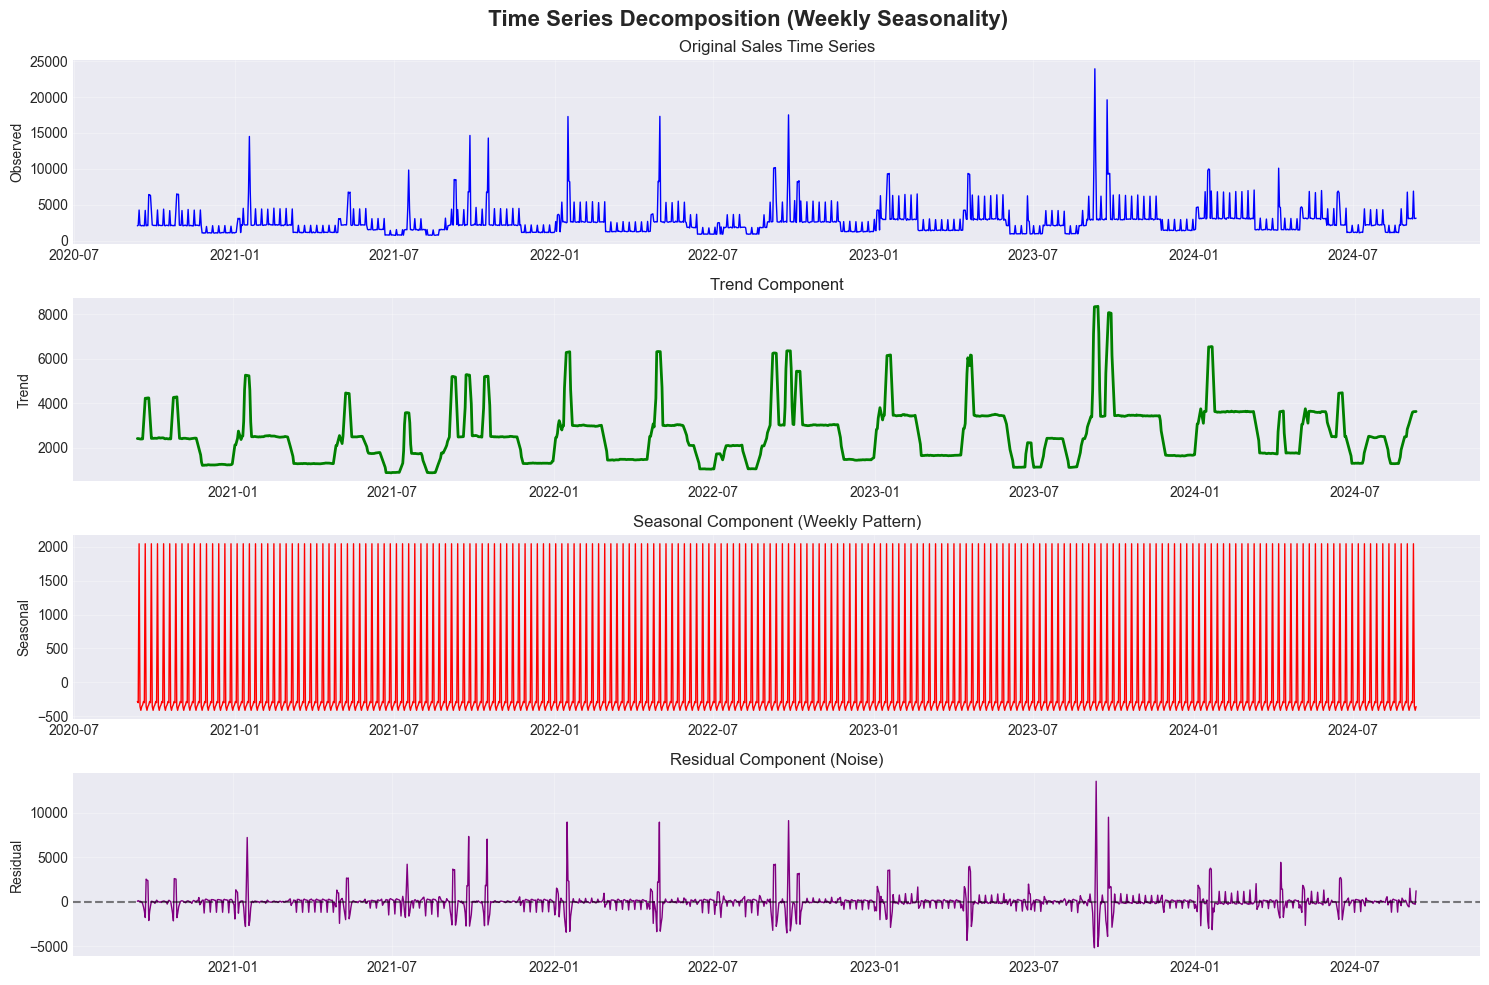

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_time_series_decomposition():
    """Decompose time series into trend, seasonality, and residuals"""
    
    # Prepare data for decomposition (needs regular frequency)
    ts_data = daily_sales.set_index('date')['quantity']
    
    # Fill any missing dates
    idx = pd.date_range(ts_data.index.min(), ts_data.index.max(), freq='D')
    ts_data = ts_data.reindex(idx, fill_value=0)
    
    # Decomposition (adjust period based on your data)
    # Try weekly (7), monthly (30), yearly (365) patterns
    try:
        # For weekly seasonality
        decomposition = seasonal_decompose(ts_data, model='additive', period=7)
        
        fig, axes = plt.subplots(4, 1, figsize=(15, 10))
        fig.suptitle(' Time Series Decomposition (Weekly Seasonality)', fontsize=16, fontweight='bold')
        
        # Original series
        axes[0].plot(decomposition.observed, color='blue', linewidth=1)
        axes[0].set_ylabel('Observed')
        axes[0].set_title('Original Sales Time Series')
        axes[0].grid(True, alpha=0.3)
        
        # Trend
        axes[1].plot(decomposition.trend, color='green', linewidth=2)
        axes[1].set_ylabel('Trend')
        axes[1].set_title('Trend Component')
        axes[1].grid(True, alpha=0.3)
        
        # Seasonality
        axes[2].plot(decomposition.seasonal, color='red', linewidth=1)
        axes[2].set_ylabel('Seasonal')
        axes[2].set_title('Seasonal Component (Weekly Pattern)')
        axes[2].grid(True, alpha=0.3)
        
        # Residuals
        axes[3].plot(decomposition.resid, color='purple', linewidth=1)
        axes[3].set_ylabel('Residual')
        axes[3].set_title('Residual Component (Noise)')
        axes[3].grid(True, alpha=0.3)
        axes[3].axhline(y=0, color='black', linestyle='--', alpha=0.5)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Could not decompose: {e}")
        # Plot simple moving averages instead
        plot_moving_averages()

plot_time_series_decomposition()

2. Moving Averages for Trend Analysis

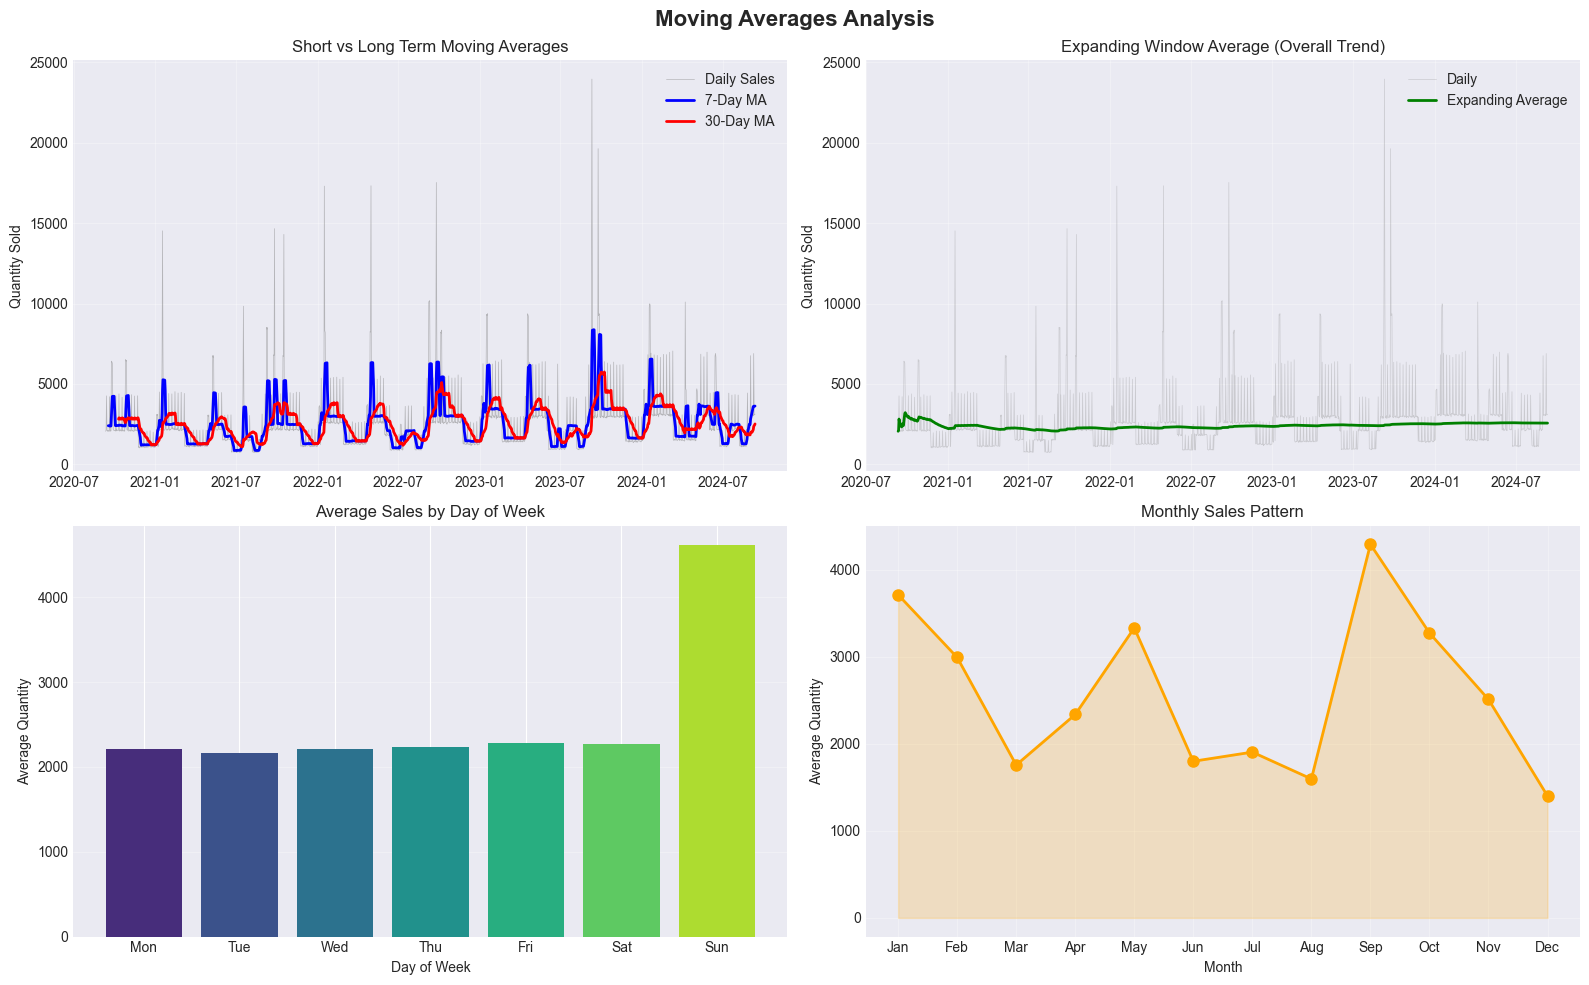

In [15]:
def plot_moving_averages():
    """Visualize different moving averages to identify trends"""
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Moving Averages Analysis', fontsize=16, fontweight='bold')
    
    ts_data = daily_sales.set_index('date')['quantity']
    
    # 1. Short-term vs Long-term moving averages
    axes[0, 0].plot(ts_data.index, ts_data.values, color='gray', alpha=0.5, label='Daily Sales', linewidth=0.5)
    axes[0, 0].plot(ts_data.index, ts_data.rolling(window=7).mean(), color='blue', linewidth=2, label='7-Day MA')
    axes[0, 0].plot(ts_data.index, ts_data.rolling(window=30).mean(), color='red', linewidth=2, label='30-Day MA')
    axes[0, 0].set_title('Short vs Long Term Moving Averages')
    axes[0, 0].set_ylabel('Quantity Sold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Expanding window average (cumulative average)
    axes[0, 1].plot(ts_data.index, ts_data.values, color='gray', alpha=0.3, linewidth=0.5, label='Daily')
    axes[0, 1].plot(ts_data.index, ts_data.expanding().mean(), color='green', linewidth=2, label='Expanding Average')
    axes[0, 1].set_title('Expanding Window Average (Overall Trend)')
    axes[0, 1].set_ylabel('Quantity Sold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Weekly patterns (group by day of week)
    daily_sales['day_of_week'] = daily_sales['date'].dt.day_name()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekly_pattern = daily_sales.groupby('day_of_week')['quantity'].mean().reindex(day_order)
    
    axes[1, 0].bar(range(7), weekly_pattern.values, color=sns.color_palette('viridis', 7))
    axes[1, 0].set_title('Average Sales by Day of Week')
    axes[1, 0].set_xlabel('Day of Week')
    axes[1, 0].set_ylabel('Average Quantity')
    axes[1, 0].set_xticks(range(7))
    axes[1, 0].set_xticklabels([d[:3] for d in day_order])
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # 4. Monthly patterns
    daily_sales['month'] = daily_sales['date'].dt.month_name()
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    monthly_pattern = daily_sales.groupby('month')['quantity'].mean().reindex(month_order, fill_value=0)
    
    axes[1, 1].plot(range(12), monthly_pattern.values, marker='o', color='orange', linewidth=2, markersize=8)
    axes[1, 1].set_title('Monthly Sales Pattern')
    axes[1, 1].set_xlabel('Month')
    axes[1, 1].set_ylabel('Average Quantity')
    axes[1, 1].set_xticks(range(12))
    axes[1, 1].set_xticklabels([m[:3] for m in month_order])
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].fill_between(range(12), 0, monthly_pattern.values, alpha=0.2, color='orange')
    
    plt.tight_layout()
    plt.show()

plot_moving_averages()

3. Autocorrelation & Partial Autocorrelation (ACF/PACF)

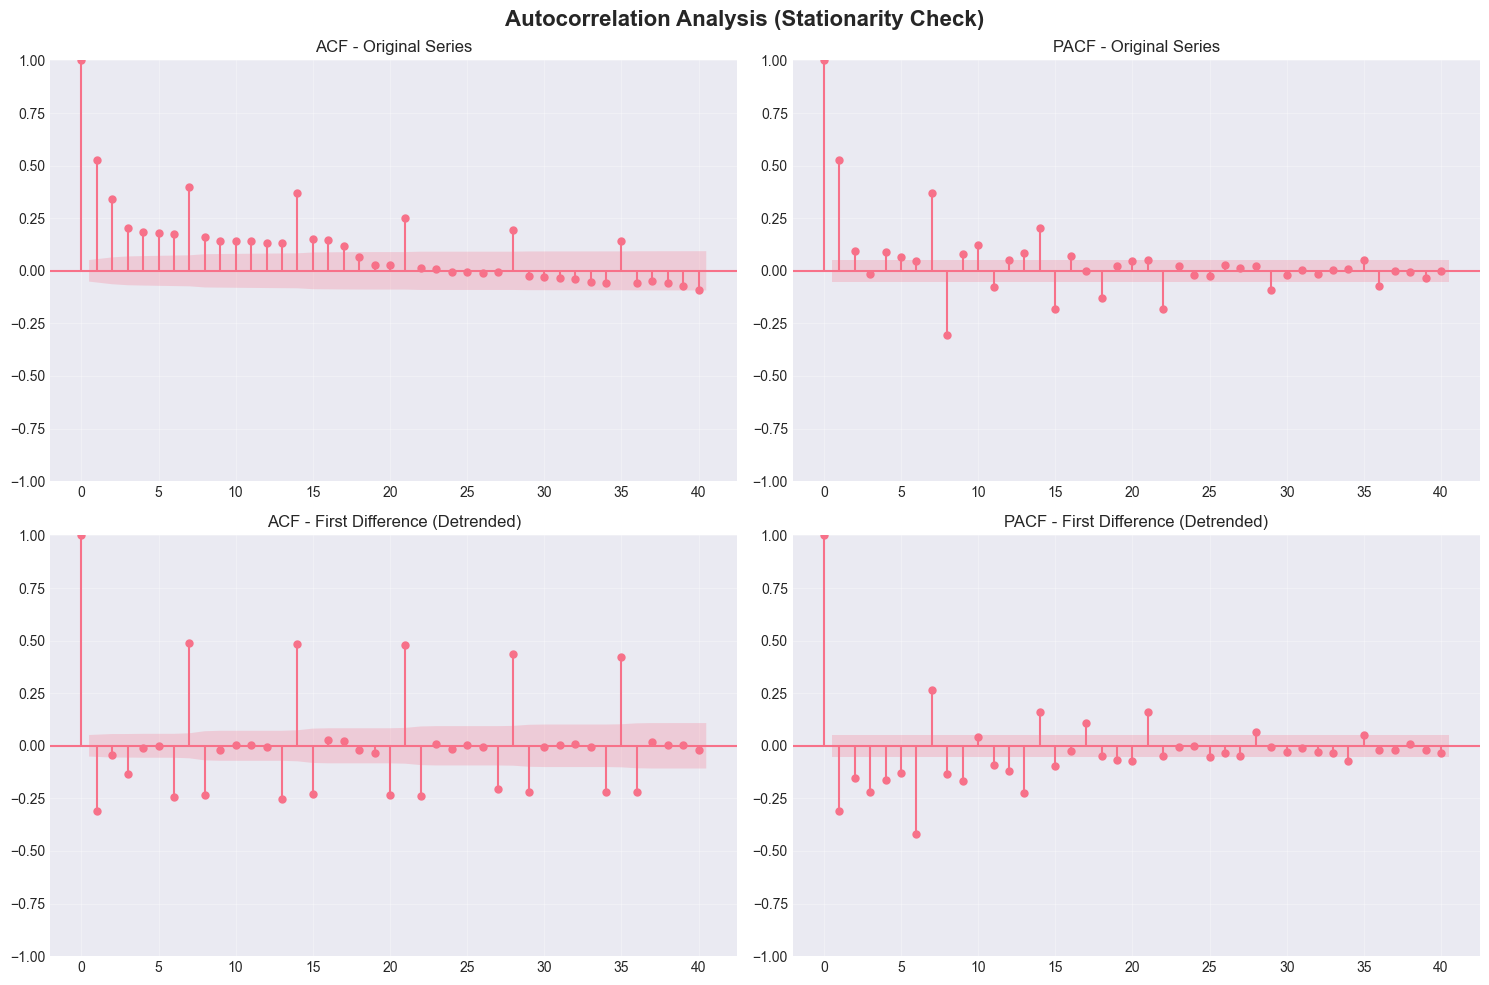

ACF/PACF Insights:
--------------------------------------------------
* ACF shows correlation with past values
* PACF shows direct relationship after removing indirect effects
* Significant spikes at lag 7 suggest weekly seasonality
* Slow decaying ACF indicates trend (needs differencing)
* Check for spikes at lag 30 for monthly patterns


In [30]:
def plot_acf_pacf():
    """Plot ACF and PACF for lag analysis"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Autocorrelation Analysis (Stationarity Check)', fontsize=16, fontweight='bold')
    
    ts_data = daily_sales.set_index('date')['quantity']
    
    # Original series ACF
    plot_acf(ts_data, lags=40, ax=axes[0, 0], title='ACF - Original Series')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Original series PACF
    plot_pacf(ts_data, lags=40, ax=axes[0, 1], title='PACF - Original Series')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Differenced series (remove trend)
    diff_data = ts_data.diff().dropna()
    
    # Differenced series ACF
    plot_acf(diff_data, lags=40, ax=axes[1, 0], title='ACF - First Difference (Detrended)')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Differenced series PACF
    plot_pacf(diff_data, lags=40, ax=axes[1, 1], title='PACF - First Difference (Detrended)')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print insights
    print("ACF/PACF Insights:")
    print("-" * 50)
    print("* ACF shows correlation with past values")
    print("* PACF shows direct relationship after removing indirect effects")
    print("* Significant spikes at lag 7 suggest weekly seasonality")
    print("* Slow decaying ACF indicates trend (needs differencing)")
    print("* Check for spikes at lag 30 for monthly patterns")

plot_acf_pacf()

4. Seasonality Analysis with Calendar Heatmap

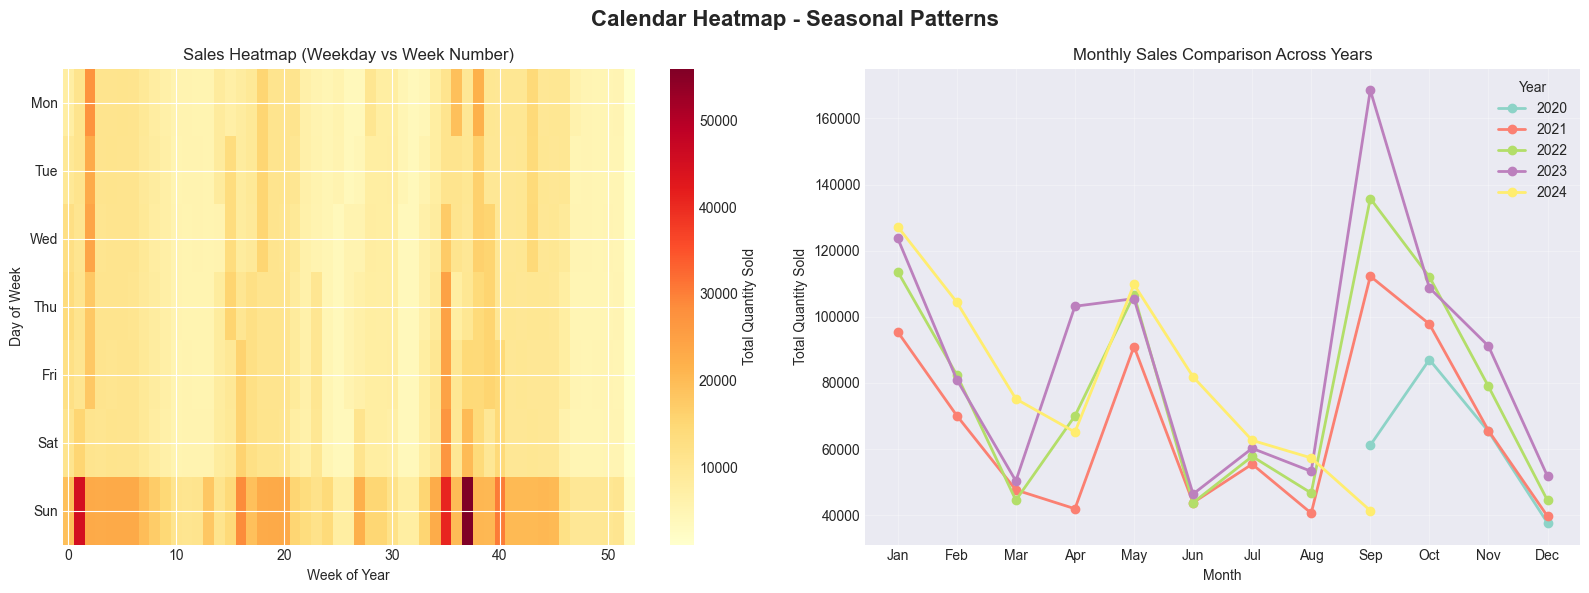

In [25]:
def plot_calendar_heatmap():
    """Create calendar heatmap to visualize seasonal patterns"""
    
    # Prepare data for calendar heatmap
    calendar_data = daily_sales.copy()
    calendar_data['year'] = calendar_data['date'].dt.year
    calendar_data['month'] = calendar_data['date'].dt.month
    calendar_data['day'] = calendar_data['date'].dt.day
    calendar_data['weekday'] = calendar_data['date'].dt.weekday
    calendar_data['week'] = calendar_data['date'].dt.isocalendar().week
    
    # Pivot for heatmap
    yearly_data = calendar_data.pivot_table(
        values='quantity',
        index='weekday',
        columns='week',
        aggfunc='sum'
    ).fillna(0)
    
    # Reorder days (Monday=0 to Sunday=6)
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Calendar Heatmap - Seasonal Patterns', fontsize=16, fontweight='bold')
    
    # Heatmap
    im = axes[0].imshow(yearly_data, aspect='auto', cmap='YlOrRd')
    axes[0].set_title('Sales Heatmap (Weekday vs Week Number)')
    axes[0].set_xlabel('Week of Year')
    axes[0].set_ylabel('Day of Week')
    axes[0].set_yticks(range(7))
    axes[0].set_yticklabels(day_names)
    plt.colorbar(im, ax=axes[0], label='Total Quantity Sold')
    
    # Monthly aggregation
    monthly_sales = calendar_data.groupby(['year', 'month'])['quantity'].sum().unstack(level=0)
    
    # Plot monthly patterns across years
    colors = plt.cm.Set3(np.linspace(0, 1, len(monthly_sales.columns)))
    
    for i, year in enumerate(monthly_sales.columns):
        axes[1].plot(range(1, 13), monthly_sales[year].reindex(range(1, 13)), 
                    marker='o', label=year, color=colors[i], linewidth=2)
    
    axes[1].set_title('Monthly Sales Comparison Across Years')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Total Quantity Sold')
    axes[1].set_xticks(range(1, 13))
    axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[1].legend(title='Year')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_calendar_heatmap()

5. Event & Fasting Impact Analysis

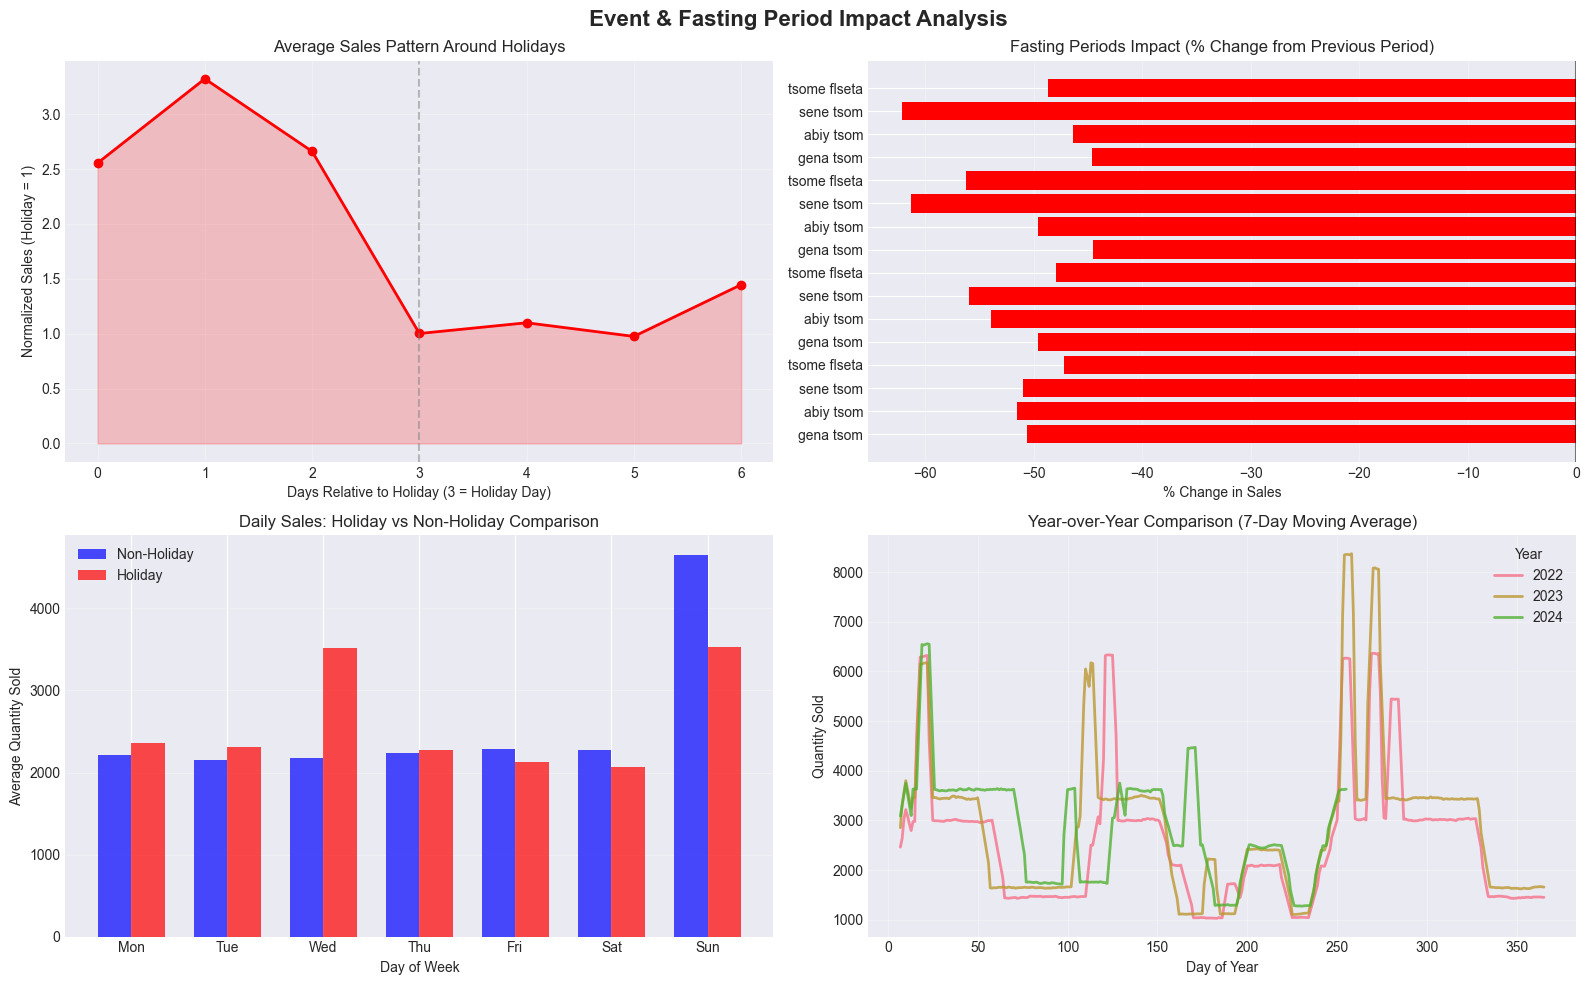

In [24]:
def plot_event_impact_analysis():
    """Analyze impact of events and fasting periods on sales"""
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(' Event & Fasting Period Impact Analysis', fontsize=16, fontweight='bold')
    
    # Prepare data
    ts_data = daily_sales.set_index('date')['quantity']
    
    # 1. Event impact (before/after analysis)
    event_dates = events[events['is_holiday'] == 1]['date'].tolist()
    
    # Analyze 3 days before and after each event
    event_windows = []
    for event_date in event_dates[:10]:  # Limit to first 10 for clarity
        start_date = event_date - timedelta(days=3)
        end_date = event_date + timedelta(days=3)
        
        window_data = ts_data.loc[start_date:end_date]
        if len(window_data) > 0:
            # Normalize to event day = 0
            normalized = window_data.values / window_data.loc[event_date] if event_date in window_data.index else window_data.values
            event_windows.append(normalized)
    
    if event_windows:
        # Pad with NaNs for equal length
        max_len = max(len(w) for w in event_windows)
        padded_windows = []
        for w in event_windows:
            if len(w) < max_len:
                padded = np.pad(w, (0, max_len - len(w)), constant_values=np.nan)
                padded_windows.append(padded)
            else:
                padded_windows.append(w)
        
        avg_pattern = np.nanmean(padded_windows, axis=0)
        
        axes[0, 0].plot(range(len(avg_pattern)), avg_pattern, marker='o', linewidth=2, color='red')
        axes[0, 0].axvline(x=3, color='gray', linestyle='--', alpha=0.5)  # Event day
        axes[0, 0].set_title('Average Sales Pattern Around Holidays')
        axes[0, 0].set_xlabel('Days Relative to Holiday (3 = Holiday Day)')
        axes[0, 0].set_ylabel('Normalized Sales (Holiday = 1)')
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].fill_between(range(len(avg_pattern)), 0, avg_pattern, alpha=0.2, color='red')
    
    # 2. Fasting periods impact
    fasting_impact_data = []
    fasting_labels = []
    
    for _, fast in fasting.iterrows():
        # Sales during fasting
        during_fasting = daily_sales[
            (daily_sales['date'] >= fast['start_date']) & 
            (daily_sales['date'] <= fast['end_date'])
        ]['quantity'].mean()
        
        # Sales before fasting (same duration before)
        before_start = fast['start_date'] - (fast['end_date'] - fast['start_date'])
        before_fasting = daily_sales[
            (daily_sales['date'] >= before_start) & 
            (daily_sales['date'] < fast['start_date'])
        ]['quantity'].mean()
        
        if not np.isnan(during_fasting) and not np.isnan(before_fasting) and before_fasting > 0:
            impact = (during_fasting - before_fasting) / before_fasting * 100
            fasting_impact_data.append(impact)
            fasting_labels.append(fast['fasting_name'][:20])
    
    if fasting_impact_data:
        colors = ['red' if x < 0 else 'green' for x in fasting_impact_data]
        axes[0, 1].barh(range(len(fasting_labels)), fasting_impact_data, color=colors)
        axes[0, 1].axvline(x=0, color='black', linestyle='-', alpha=0.5)
        axes[0, 1].set_title('Fasting Periods Impact (% Change from Previous Period)')
        axes[0, 1].set_xlabel('% Change in Sales')
        axes[0, 1].set_yticks(range(len(fasting_labels)))
        axes[0, 1].set_yticklabels(fasting_labels)
        axes[0, 1].grid(True, alpha=0.3, axis='x')
    
    # 3. Weekly seasonality with events marked
    daily_sales_copy = daily_sales.copy()
    daily_sales_copy['is_holiday'] = daily_sales_copy['date'].isin(event_dates).astype(int)
    
    # Get day of week averages
    day_avg = daily_sales_copy.groupby(['date', 'is_holiday'])['quantity'].mean().reset_index()
    day_avg['day_of_week'] = day_avg['date'].dt.day_name()
    
    # Separate holiday and non-holiday
    holiday_days = day_avg[day_avg['is_holiday'] == 1].groupby('day_of_week')['quantity'].mean()
    non_holiday_days = day_avg[day_avg['is_holiday'] == 0].groupby('day_of_week')['quantity'].mean()
    
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    holiday_days = holiday_days.reindex(day_order, fill_value=0)
    non_holiday_days = non_holiday_days.reindex(day_order, fill_value=0)
    
    x = np.arange(7)
    width = 0.35
    
    axes[1, 0].bar(x - width/2, non_holiday_days.values, width, label='Non-Holiday', color='blue', alpha=0.7)
    axes[1, 0].bar(x + width/2, holiday_days.values, width, label='Holiday', color='red', alpha=0.7)
    axes[1, 0].set_title('Daily Sales: Holiday vs Non-Holiday Comparison')
    axes[1, 0].set_xlabel('Day of Week')
    axes[1, 0].set_ylabel('Average Quantity Sold')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels([d[:3] for d in day_order])
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # 4. Year-over-Year comparison
    daily_sales['year'] = daily_sales['date'].dt.year
    daily_sales['day_of_year'] = daily_sales['date'].dt.dayofyear
    
    # Plot YOY comparison
    years = sorted(daily_sales['year'].unique())
    
    for year in years[-3:]:  # Last 3 years
        year_data = daily_sales[daily_sales['year'] == year]
        axes[1, 1].plot(year_data['day_of_year'], year_data['quantity'].rolling(7).mean(), 
                       label=str(year), linewidth=2, alpha=0.8)
    
    axes[1, 1].set_title('Year-over-Year Comparison (7-Day Moving Average)')
    axes[1, 1].set_xlabel('Day of Year')
    axes[1, 1].set_ylabel('Quantity Sold')
    axes[1, 1].legend(title='Year')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_event_impact_analysis()

6. Forecastability Analysis

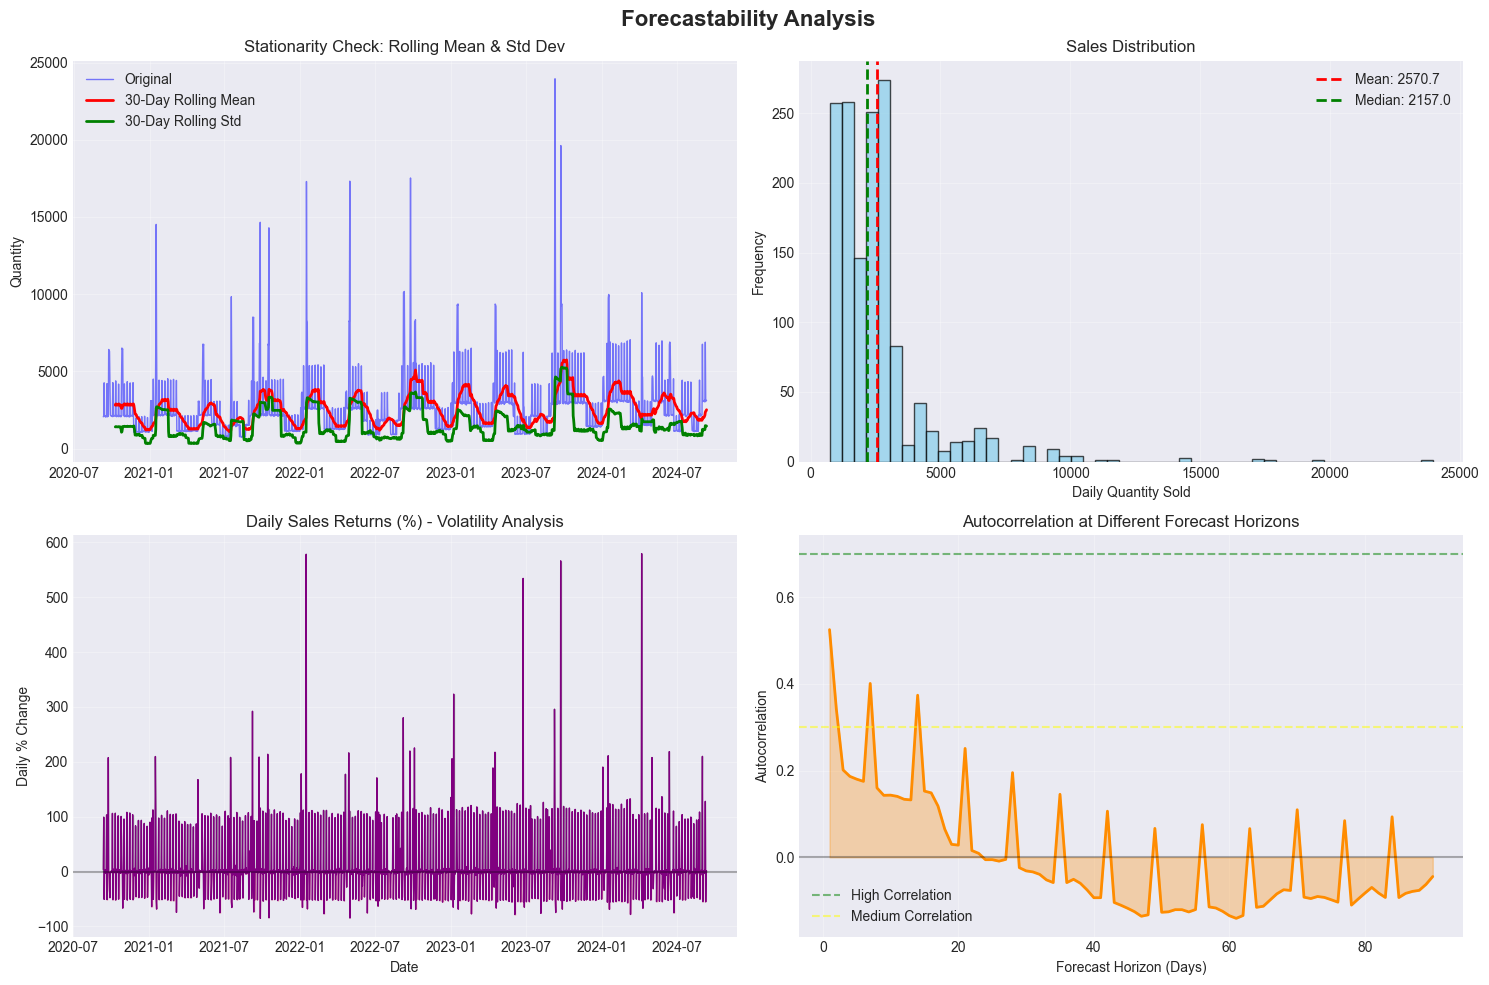


 Forecastability Assessment:
* Data Points: 1462 days
* Mean Daily Sales: 2570.73
* Std Dev: 1962.68 (CV: 76.3%)
* Skewness: 3.836 (right skewed)
* Missing Dates: 0
* Zero Sales Days: 0 (0.0%)
* Autocorrelation (lag 1): 0.525
* Autocorrelation (lag 7): 0.401

 Forecasting Recommendations:
--------------------------------------------------


In [31]:
def plot_forecastability_analysis():
    """Analyze data characteristics for forecasting"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(' Forecastability Analysis', fontsize=16, fontweight='bold')
    
    ts_data = daily_sales.set_index('date')['quantity']
    
    # 1. Stationarity check with rolling statistics
    rolling_mean = ts_data.rolling(window=30).mean()
    rolling_std = ts_data.rolling(window=30).std()
    
    axes[0, 0].plot(ts_data.index, ts_data.values, color='blue', alpha=0.5, label='Original', linewidth=1)
    axes[0, 0].plot(rolling_mean.index, rolling_mean.values, color='red', linewidth=2, label='30-Day Rolling Mean')
    axes[0, 0].plot(rolling_std.index, rolling_std.values, color='green', linewidth=2, label='30-Day Rolling Std')
    axes[0, 0].set_title('Stationarity Check: Rolling Mean & Std Dev')
    axes[0, 0].set_ylabel('Quantity')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Distribution of sales
    axes[0, 1].hist(ts_data.values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 1].axvline(ts_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {ts_data.mean():.1f}')
    axes[0, 1].axvline(ts_data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {ts_data.median():.1f}')
    axes[0, 1].set_title('Sales Distribution')
    axes[0, 1].set_xlabel('Daily Quantity Sold')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Volatility clustering
    returns = ts_data.pct_change().dropna() * 100  # Percentage change
    
    axes[1, 0].plot(returns.index, returns.values, color='purple', linewidth=1)
    axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, 0].fill_between(returns.index, 0, returns.values, where=returns.values>=0, 
                           color='green', alpha=0.3)
    axes[1, 0].fill_between(returns.index, 0, returns.values, where=returns.values<0, 
                           color='red', alpha=0.3)
    axes[1, 0].set_title('Daily Sales Returns (%) - Volatility Analysis')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Daily % Change')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Forecast horizon analysis
    # Calculate autocorrelation at different lags
    max_lag = 90
    autocorrs = []
    lags = range(1, max_lag + 1)
    
    for lag in lags:
        if lag < len(ts_data):
            autocorr = ts_data.autocorr(lag=lag)
            autocorrs.append(autocorr)
    
    axes[1, 1].plot(lags[:len(autocorrs)], autocorrs, color='darkorange', linewidth=2)
    axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, 1].axhline(y=0.7, color='green', linestyle='--', alpha=0.5, label='High Correlation')
    axes[1, 1].axhline(y=0.3, color='yellow', linestyle='--', alpha=0.5, label='Medium Correlation')
    axes[1, 1].set_title('Autocorrelation at Different Forecast Horizons')
    axes[1, 1].set_xlabel('Forecast Horizon (Days)')
    axes[1, 1].set_ylabel('Autocorrelation')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].fill_between(lags[:len(autocorrs)], 0, autocorrs, alpha=0.3, color='darkorange')
    
    plt.tight_layout()
    plt.show()
    
    # Print forecastability insights
    print("\n Forecastability Assessment:")
    print("=" * 50)
    print(f"* Data Points: {len(ts_data)} days")
    print(f"* Mean Daily Sales: {ts_data.mean():.2f}")
    print(f"* Std Dev: {ts_data.std():.2f} (CV: {ts_data.std()/ts_data.mean()*100:.1f}%)")
    print(f"* Skewness: {ts_data.skew():.3f} {'(right skewed)' if ts_data.skew() > 0.5 else '(fairly symmetric)'}")
    print(f"* Missing Dates: {pd.date_range(start=ts_data.index.min(), end=ts_data.index.max()).difference(ts_data.index).shape[0]}")
    print(f"* Zero Sales Days: {(ts_data == 0).sum()} ({(ts_data == 0).sum()/len(ts_data)*100:.1f}%)")
    print(f"* Autocorrelation (lag 1): {ts_data.autocorr(lag=1):.3f}")
    print(f"* Autocorrelation (lag 7): {ts_data.autocorr(lag=7):.3f}")
    
    # Recommendations
    print("\n Forecasting Recommendations:")
    print("-" * 50)
    if ts_data.autocorr(lag=7) > 0.5:
        print(" Strong weekly seasonality detected - include lag 7 features")
    if ts_data.autocorr(lag=30) > 0.3:
        print(" Monthly patterns present - consider monthly seasonality")
    if (ts_data == 0).sum()/len(ts_data) > 0.1:
        print(" Many zero-sales days - consider classification then regression")
    if ts_data.std()/ts_data.mean() > 1:
        print(" High volatility - consider ensemble methods or probabilistic forecasting")
    if len(ts_data) < 365:
        print(" Less than 1 year of data - limit forecast horizon")
plot_forecastability_analysis()

7. Product-Level Forecasting Patterns

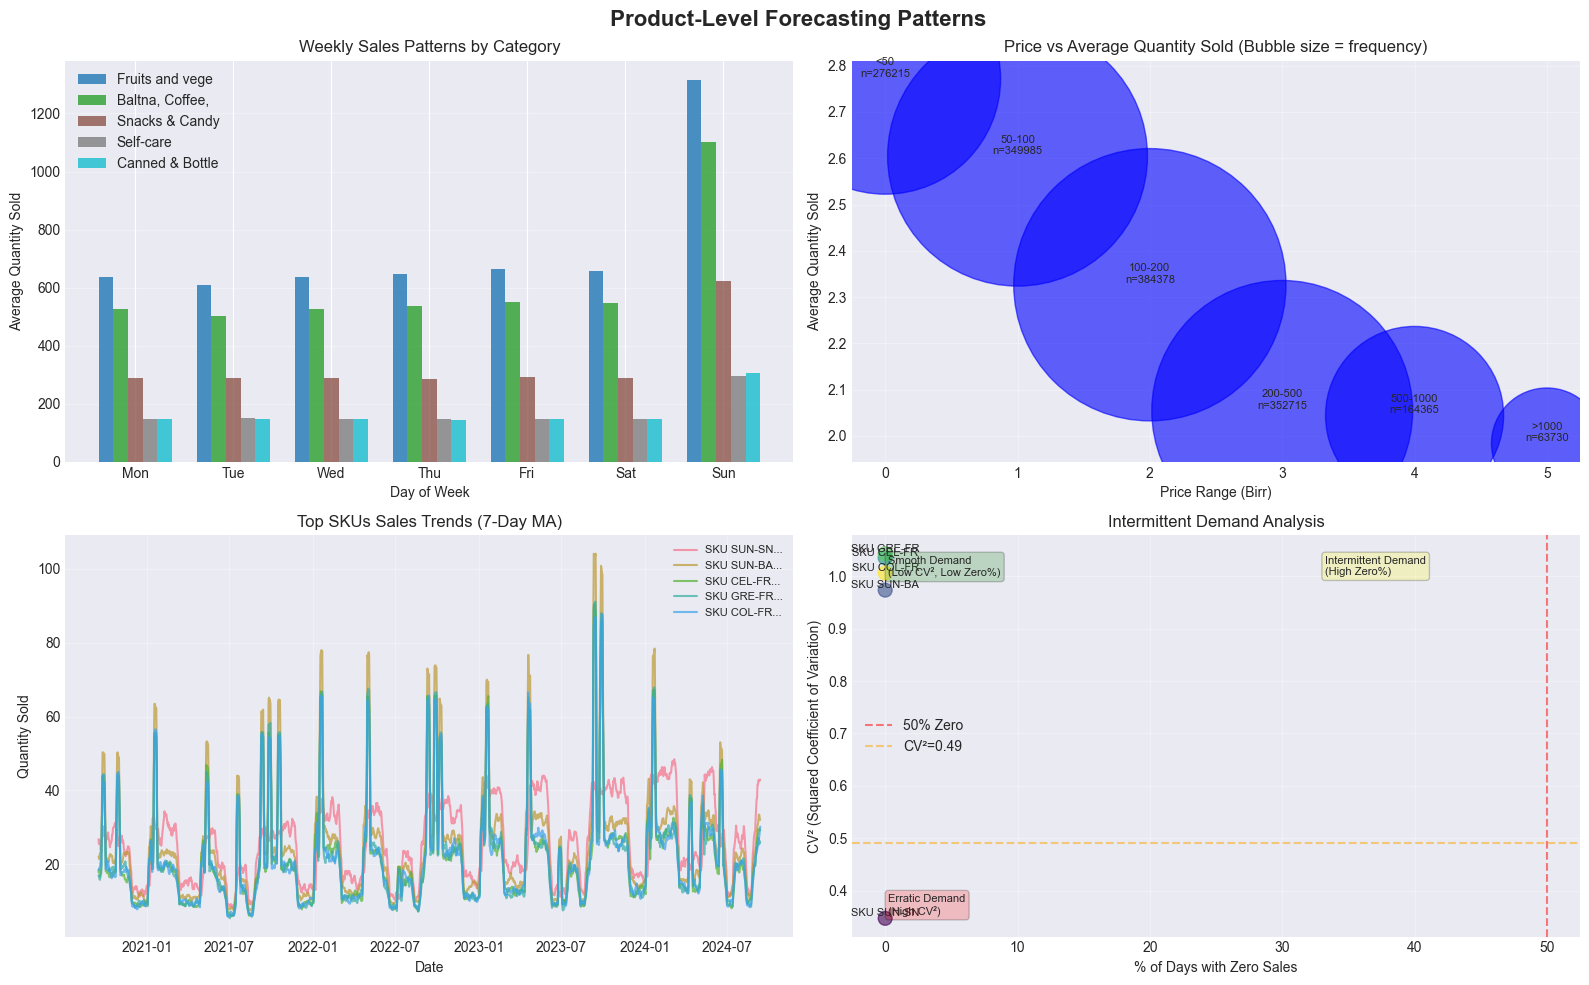

In [22]:
def plot_product_level_patterns():
    """Analyze forecasting patterns at product level"""
    
    # Merge sales with product data
    sales_with_products = pd.merge(sales, products, left_on='sku_id', right_on='SKU ID', how='left')
    
    # Get top categories
    top_categories = sales_with_products['category'].value_counts().head(5).index
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(' Product-Level Forecasting Patterns', fontsize=16, fontweight='bold')
    
    # 1. Category-wise seasonality
    category_data = []
    category_labels = []
    
    for category in top_categories:
        cat_sales = sales_with_products[sales_with_products['category'] == category]
        cat_daily = cat_sales.groupby('date')['quantity'].sum().reset_index()
        cat_daily = cat_daily.set_index('date').resample('D').sum().fillna(0)
        
        if len(cat_daily) > 0:
            # Calculate weekly pattern
            cat_daily['day_of_week'] = cat_daily.index.dayofweek
            weekly_pattern = cat_daily.groupby('day_of_week')['quantity'].mean()
            category_data.append(weekly_pattern.values)
            category_labels.append(category[:15])
    
    # Plot weekly patterns by category
    x = np.arange(7)
    width = 0.15
    colors = plt.cm.tab10(np.linspace(0, 1, len(category_data)))
    
    for i, (data, label, color) in enumerate(zip(category_data, category_labels, colors)):
        axes[0, 0].bar(x + i*width - (len(category_data)-1)*width/2, data, width, 
                      label=label, color=color, alpha=0.8)
    
    axes[0, 0].set_title('Weekly Sales Patterns by Category')
    axes[0, 0].set_xlabel('Day of Week')
    axes[0, 0].set_ylabel('Average Quantity Sold')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # 2. Price elasticity analysis (conceptual)
    # Group by price ranges
    sales_with_products['price_range'] = pd.cut(sales_with_products['price in birr'], 
                                               bins=[0, 50, 100, 200, 500, 1000, float('inf')],
                                               labels=['<50', '50-100', '100-200', '200-500', '500-1000', '>1000'])
    
    price_elasticity = sales_with_products.groupby('price_range')['quantity'].agg(['mean', 'count']).reset_index()
    
    axes[0, 1].scatter(price_elasticity.index, price_elasticity['mean'], 
                      s=price_elasticity['count']/10, alpha=0.6, color='blue')
    
    for i, row in price_elasticity.iterrows():
        axes[0, 1].text(i, row['mean'], f"{row['price_range']}\nn={row['count']}", 
                       fontsize=8, ha='center', va='bottom')
    
    axes[0, 1].set_title('Price vs Average Quantity Sold (Bubble size = frequency)')
    axes[0, 1].set_xlabel('Price Range (Birr)')
    axes[0, 1].set_ylabel('Average Quantity Sold')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Product lifecycle patterns
    # Analyze sales patterns of individual products over time
    top_skus = sales_with_products['sku_id'].value_counts().head(5).index
    
    for sku in top_skus:
        sku_sales = sales_with_products[sales_with_products['sku_id'] == sku]
        sku_daily = sku_sales.groupby('date')['quantity'].sum().reset_index()
        sku_daily = sku_daily.set_index('date').resample('D').sum().fillna(0)
        
        if len(sku_daily) > 30:  # Only plot if enough data
            axes[1, 0].plot(sku_daily.index, sku_daily['quantity'].rolling(7).mean(), 
                           label=f'SKU {sku[:6]}...', linewidth=1.5, alpha=0.7)
    
    axes[1, 0].set_title('Top SKUs Sales Trends (7-Day MA)')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Quantity Sold')
    axes[1, 0].legend(fontsize=8)
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Intermittent demand analysis
    demand_patterns = []
    sku_labels = []
    
    for sku in top_skus:
        sku_sales = sales_with_products[sales_with_products['sku_id'] == sku]
        sku_daily = sku_sales.groupby('date')['quantity'].sum()
        
        if len(sku_daily) > 0:
            # Calculate demand patterns
            zero_percentage = (sku_daily == 0).sum() / len(sku_daily) * 100
            cv_squared = (sku_daily.std() / sku_daily.mean()) ** 2 if sku_daily.mean() > 0 else 0
            
            demand_patterns.append((zero_percentage, cv_squared))
            sku_labels.append(f'SKU {sku[:6]}')
    
    if demand_patterns:
        zero_pct, cv_sq = zip(*demand_patterns)
        
        scatter = axes[1, 1].scatter(zero_pct, cv_sq, s=100, alpha=0.6, c=range(len(zero_pct)), cmap='viridis')
        
        for i, label in enumerate(sku_labels):
            axes[1, 1].text(zero_pct[i], cv_sq[i], label, fontsize=8, ha='center', va='bottom')
        
        axes[1, 1].axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% Zero')
        axes[1, 1].axhline(y=0.49, color='orange', linestyle='--', alpha=0.5, label='CV²=0.49')
        
        axes[1, 1].set_title('Intermittent Demand Analysis')
        axes[1, 1].set_xlabel('% of Days with Zero Sales')
        axes[1, 1].set_ylabel('CV² (Squared Coefficient of Variation)')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        # Add interpretation
        axes[1, 1].text(0.05, 0.95, 'Smooth Demand\n(Low CV², Low Zero%)', 
                       transform=axes[1, 1].transAxes, fontsize=8,
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='green', alpha=0.2))
        axes[1, 1].text(0.65, 0.95, 'Intermittent Demand\n(High Zero%)', 
                       transform=axes[1, 1].transAxes, fontsize=8,
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.2))
        axes[1, 1].text(0.05, 0.05, 'Erratic Demand\n(High CV²)', 
                       transform=axes[1, 1].transAxes, fontsize=8,
                       verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='red', alpha=0.2))
    
    plt.tight_layout()
    plt.show()

plot_product_level_patterns()